<a href="https://colab.research.google.com/github/jacksonns/IMBD-Data-Visualization/blob/main/imbd_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processando Conjuntos de Dados do IMDB

## Baixando Conjuntos de Dados

In [3]:
import urllib
import gzip
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def download_and_extract(file_name):
  base_url = 'https://datasets.imdbws.com/'
  url = base_url + file_name + '.gz'
  with urllib.request.urlopen(url) as response:
    # Decompress file
    with gzip.GzipFile(fileobj=response) as uncompressed:
      file_content = uncompressed.read()
    # write to file in binary mode 'wb'
    with open(file_name, 'wb') as f:
      f.write(file_content)

In [3]:
datasets = ['name.basics.tsv', 'title.akas.tsv', 'title.basics.tsv', 
            'title.crew.tsv', 'title.principals.tsv', 'title.ratings.tsv']

for file in datasets:
  download_and_extract(file)



## Explorando 'Title Basics'

Tabela com 9.861.052 linhas, contendo diferentes tipos de obras ('short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot')

In [ ]:
titles = pd.read_csv('title.basics.tsv', sep='\t')
titles.head()

<ipython-input-4-2edac2f4f7dc>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles = pd.read_csv('title.basics.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
len(titles.index)

9864419

In [ ]:
# Tipos de obras no dataset.
title_types = titles['titleType'].unique()
title_types

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

É possível perceber que a maioria das obras estão na categoria tvEpisode. Podemos ignorá-las a princípio para reduzir o tamanho dos dados




Text(0.5, 1.0, 'Tipos de obras')

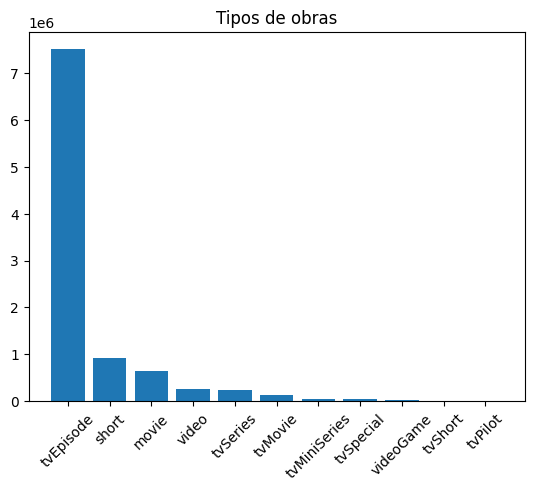

In [ ]:
count_titles = titles['titleType'].value_counts().sort_values(ascending=False)
plt.bar(count_titles.index, count_titles.values)
plt.xticks(rotation=45)
plt.title('Tipos de obras')

Considerando apenas a categoria filme ('movie'). São 645.594 obras nessa categoria

In [ ]:
movies = titles.query(" titleType == 'movie' ")
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama


In [ ]:
len(movies.index)

645762

Visualizando curva de quantidade de filmes por ano

In [ ]:
nan_index = movies[movies['startYear'] == '\\N'].index
movies_with_year = movies.drop(nan_index)
year_counts = movies_with_year['startYear'].value_counts().sort_index()
year_counts

1894     1
1896     1
1897     2
1898     7
1899     8
        ..
2026    30
2027    11
2028     1
2029     3
2030     1
Name: startYear, Length: 136, dtype: int64

Text(0.5, 1.0, 'Quantidade de filmes por ano')

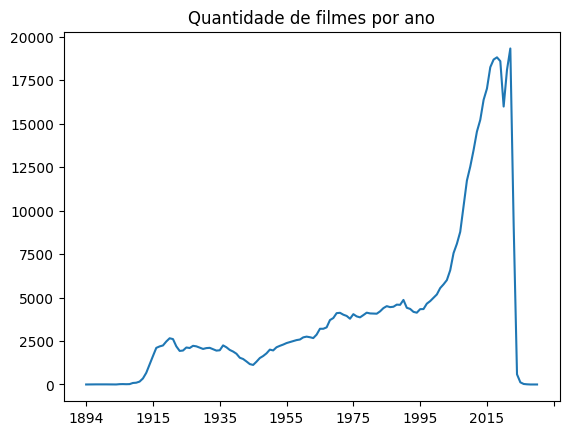

In [ ]:
year_counts.plot()
plt.title('Quantidade de filmes por ano')

Visualizando distribuição de gêneros dos filmes

In [ ]:
# Considerando apenas filmes que possuem pelo o menos um gênero associado
nan_genres = movies[movies['genres'] == '\\N'].index
movies_with_genres = movies.drop(nan_genres)
len(movies_with_genres)

573667

In [ ]:
# Obtendo todos os gêneros únicos considerados
movies_genres_column = movies_with_genres['genres'].str.split(',')
unique_genres = np.unique(np.concatenate(movies_genres_column.values))
unique_genres 

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'], dtype='<U11')

In [ ]:
# Contando número de filmes de cada gênero (1 filme pode ter mais de um gênero)
genres_expanded = movies_genres_column.explode().value_counts()
genres_expanded

Drama          234206
Documentary    122438
Comedy         109178
Action          53883
Romance         47301
Thriller        44704
Crime           37226
Horror          36965
Adventure       28099
Family          17664
Biography       17248
Mystery         16995
Fantasy         15339
History         14260
Sci-Fi          13920
Music           13617
Musical         10231
War              9279
Adult            9245
Animation        9092
Western          8151
Sport            7108
News             1446
Film-Noir         881
Reality-TV        515
Talk-Show         175
Short              54
Game-Show          26
Name: genres, dtype: int64

Text(0.5, 1.0, 'Distribuição de gêneros dos filmes')

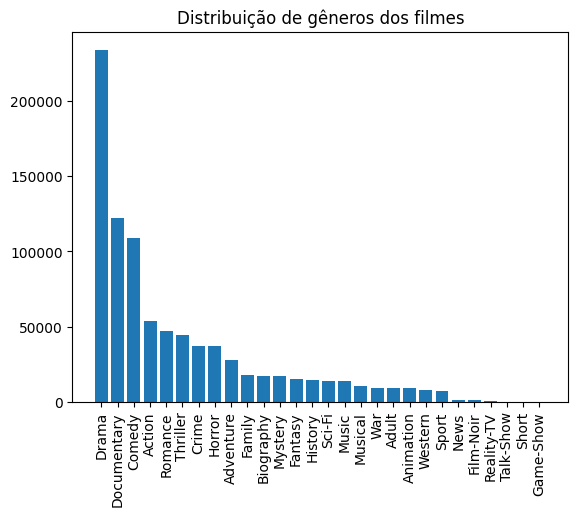

In [ ]:
plt.bar(genres_expanded.index, genres_expanded.values)
plt.xticks(rotation=90)
plt.title('Distribuição de gêneros dos filmes')

## Explorando 'Title Principals'

In [ ]:
titles = pd.read_csv('title.principals.tsv', sep='\t')
titles.head()

NameError: ignored

## Explorando elenco dos filmes

In [11]:
movies = pd.read_csv('title.basics.tsv', sep='\t')
movies = movies.query(" titleType == 'movie' ")
movies = movies[['tconst', 'primaryTitle']]
movies.head()

<ipython-input-11-0a7ecf97054c>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('title.basics.tsv', sep='\t')


,tconst,primaryTitle
8,tt0000009,Miss Jerry
144,tt0000147,The Corbett-Fitzsimmons Fight
498,tt0000502,Bohemios
570,tt0000574,The Story of the Kelly Gang
587,tt0000591,The Prodigal Son


In [18]:
# Obtendo identificadores dos filmes
movies_ids = movies['tconst'].values
movies_ids

array(['tt0000009', 'tt0000147', 'tt0000502', ..., 'tt9916706',
       'tt9916730', 'tt9916754'], dtype=object)

In [20]:
# Arquivo 'title.principals' é muito grande para ser carregado na memória principal,
# portanto, é processado em blocos

chunks = []

for chunk in pd.read_csv('title.principals.tsv', sep='\t', chunksize=1000000):
  # Filtra apenas 'principals' dos filmes
  movies_principals = chunk[chunk['tconst'].isin(movies_ids)]
  # Seleciona apenas atores e atrizes (ignorando diretores, compositores, etc)
  movies_principals = movies_principals.query(" category == 'actor' | category == 'actress' ")
  # Seleciona apenas as colunas úteis 
  movies_principals = movies_principals[['tconst', 'nconst']]
  chunks.append(movies_principals)

actors = pd.concat(chunks)

actors.head()

,tconst,nconst,category
24,tt0000009,nm0063086,actress
25,tt0000009,nm0183823,actor
26,tt0000009,nm1309758,actor
850,tt0000502,nm0215752,actor
851,tt0000502,nm0252720,actor


In [22]:
names_ids = actors['nconst'].values
names_ids

array(['nm0063086', 'nm0183823', 'nm1309758', ..., 'nm0059461',
       'nm13233318', 'nm4852679'], dtype=object)

In [23]:
# Obtendo nomes dos atores e atrizes
names = pd.read_csv('name.basics.tsv', sep='\t')
names = names[['nconst', 'primaryName']]
names = names[names['nconst'].isin(names_ids)]
names.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


In [25]:
# Fazendo merge dos dataframes para obter uma tabela única.

actors = actors.merge(movies, on='tconst').merge(names, on='nconst')
actors.head()

,tconst,nconst,category,primaryTitle,primaryName
0,tt0000009,nm0063086,actress,Miss Jerry,Blanche Bayliss
1,tt0000009,nm0183823,actor,Miss Jerry,William Courtenay
2,tt0006014,nm0183823,actor,Sealed Lips,William Courtenay
3,tt0006873,nm0183823,actor,The Island of Surprise,William Courtenay
4,tt0007129,nm0183823,actor,The Ninety and Nine,William Courtenay


In [30]:
df_agrupado = actors.groupby('tconst').apply(lambda x: [x['primaryTitle'].iloc[0], list(x['primaryName'])])
df_agrupado.head()

tconst
tt0000009    [Miss Jerry, [Blanche Bayliss, William Courten...
tt0000502          [Bohemios, [Antonio del Pozo, El Mochuelo]]
tt0000574    [The Story of the Kelly Gang, [Elizabeth Tait,...
tt0000591    [The Prodigal Son, [Georges Wague, Henri Gouge...
tt0000615    [Robbery Under Arms, [Jim Gerald, George Merri...
dtype: object

In [31]:
df_agrupado = df_agrupado.reset_index()
df_agrupado.columns = ['tconst', 'data']
df_agrupado[['title', 'names']] = pd.DataFrame(df_agrupado['data'].tolist(), index=df_agrupado.index)
df_agrupado.head()

,tconst,data,title,names
0,tt0000009,"[Miss Jerry, [Blanche Bayliss, William Courten...",Miss Jerry,"[Blanche Bayliss, William Courtenay, Chauncey ..."
1,tt0000502,"[Bohemios, [Antonio del Pozo, El Mochuelo]]",Bohemios,"[Antonio del Pozo, El Mochuelo]"
2,tt0000574,"[The Story of the Kelly Gang, [Elizabeth Tait,...",The Story of the Kelly Gang,"[Elizabeth Tait, John Tait, Nicholas Brierley,..."
3,tt0000591,"[The Prodigal Son, [Georges Wague, Henri Gouge...",The Prodigal Son,"[Georges Wague, Henri Gouget, Christiane Mande..."
4,tt0000615,"[Robbery Under Arms, [Jim Gerald, George Merri...",Robbery Under Arms,"[Jim Gerald, George Merriman, Lance Vane, Will..."


In [32]:
df_agrupado = df_agrupado[['title', 'names']]
df_agrupado.head()

,title,names
0,Miss Jerry,"[Blanche Bayliss, William Courtenay, Chauncey ..."
1,Bohemios,"[Antonio del Pozo, El Mochuelo]"
2,The Story of the Kelly Gang,"[Elizabeth Tait, John Tait, Nicholas Brierley,..."
3,The Prodigal Son,"[Georges Wague, Henri Gouget, Christiane Mande..."
4,Robbery Under Arms,"[Jim Gerald, George Merriman, Lance Vane, Will..."


In [34]:
import networkx as nx
import plotly.graph_objects as go

def network_graph(df):
  grafo = nx.Graph()

  # Adiciona nós
  for actors in df['names']:
    grafo.add_nodes_from(actors)

  # Adiciona actors
  for index, actors in enumerate(df['names']):
      for i in range(len(actors)):
          for j in range(i + 1, len(actors)):
              grafo.add_edge(actors[i], actors[j], movie=df['title'][index])

  pos = nx.spring_layout(grafo)

  x = []
  y = []
  for actor, position in pos.items():
      x.append(position[0])
      y.append(position[1])

  # Criar o gráfico de grafo usando Plotly
  fig = go.Figure()

  # Adicionar os nós
  fig.add_trace(go.Scatter(
      x=x,
      y=y,
      mode='markers',
      marker=dict(size=10, color='blue'),
      text=list(pos.keys()),
      hovertemplate='%{text}<extra></extra>'
  ))

  # Adicionar as arestas
  for edge in grafo.edges:
      x0, y0 = pos[edge[0]]
      x1, y1 = pos[edge[1]]
      movie = grafo.edges[edge]['movie']
      fig.add_trace(go.Scatter(
          x=[x0, x1],
          y=[y0, y1],
          mode='lines',
          line=dict(width=1, color='gray'),
          hovertemplate=f'{edge[0]} - {edge[1]}<br>Filme: {movie}<extra></extra>'
      ))

  # Configurar layout do gráfico
  fig.update_layout(
      title='Colaboração entre Atores',
      showlegend=False,
      hovermode='closest',
      xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
      yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
  )

  # Exibir o gráfico
  fig.show()

In [40]:
# Grafo com conjunto reduzido
network_graph(df_agrupado.head(100))

## Testando Grafo de Conexões


In [ ]:
import networkx as nx
import plotly.graph_objects as go

In [ ]:
test_df = pd.DataFrame({'movie': ['mv1', 'mv2', 'mv3'], 
                        'actors': [['fulano', 'beltrano'], ['fulano', 'ciclano'], ['beltrano', 'ciclano']] })
test_df

,movie,actors
0,mv1,"[fulano, beltrano]"
1,mv2,"[fulano, ciclano]"
2,mv3,"[beltrano, ciclano]"


In [ ]:
grafo = nx.Graph()

# Adiciona nós
for actors in test_df['actors']:
  grafo.add_nodes_from(actors)

# Adiciona actors
for index, actors in enumerate(test_df['actors']):
    for i in range(len(actors)):
        for j in range(i + 1, len(actors)):
            grafo.add_edge(actors[i], actors[j], movie=test_df['movie'][index])

pos = nx.spring_layout(grafo)

In [ ]:
x = []
y = []
for actor, position in pos.items():
    x.append(position[0])
    y.append(position[1])

# Criar o gráfico de grafo usando Plotly
fig = go.Figure()

In [ ]:
# Adicionar os nós
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(size=10, color='blue'),
    text=list(pos.keys()),
    hovertemplate='%{text}<extra></extra>'
))

# Adicionar as arestas
for edge in grafo.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    movie = grafo.edges[edge]['movie']
    fig.add_trace(go.Scatter(
        x=[x0, x1],
        y=[y0, y1],
        mode='lines',
        line=dict(width=1, color='gray'),
        hovertemplate=f'{edge[0]} - {edge[1]}<br>Filme: {movie}<extra></extra>'
    ))

# Configurar layout do gráfico
fig.update_layout(
    title='Colaboração entre Atores',
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Exibir o gráfico
fig.show()